In [21]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn

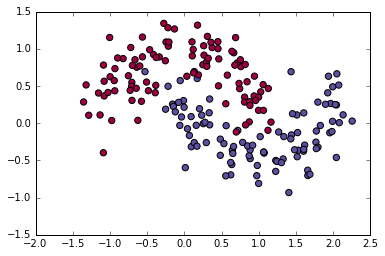

In [18]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [27]:
def plot_decision_boundary(pred_func):
    #set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the coutour and training examples
    plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[:, 0],X[:, 1], c = y, cmap = plt.cm.Spectral)

**画决策边界，尚存疑**

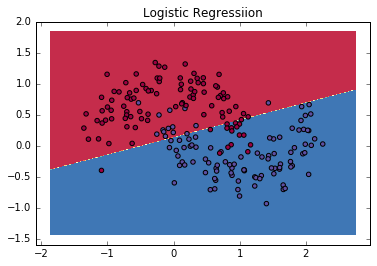

In [31]:
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title('Logistic Regressiion')

We also need to pick an _activation function_ for our hidden layer.

A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common choices for activation functions are **tanh**, the **sigmoid function**, or **ReLUs**.

**ReLU**: Rectified Linear Units

In the context of artificial neural networks, the rectifier is an activation function defined as $f(x) = max(0,x)$, where $x$ is the input to a neuron. This is also known as a **ramp function** and is analogous to half-wave rectification in electrical engineering. It has been used in convolutional networks more effectively than the widely used **logistic sigmoid** (which is inspired by probability theory, see logistic regression) and its more practical counterpart, the **hyperbolic tangent (tanh)**.

A unit employing the rectifier is also called a **rectified linear unit (ReLU)**.

A smooth approximation to the rectifier is the analytic function $f(x) = ln(1+e^x)$, which is called the **softplus function**. The derivative of softplus is $f'(x) = \frac {e^x} {e^x+1} = \frac 1 {1+e^{-x}}$, i.e. the logistic function. 

**A nice property of these functions is that their derivate can be computed using the original function value.** For example, the derivative of $tanhx$ is $1-tanh^2x$. This is useful because it allows us to compute $tanhx$ once and re-use its value later on to get the derivative.  

Because we want our network to output probabilities the activation function for the output layer will be the **softmax**, which is simply a way to convert raw scores to probabilities. If you're familiar with the logistic function you can think of softmax as its generalization to multiple classes.

Our network makes predictions using **forward propagation**, which is just a bunch of matrix multiplications and the application of the activation function(s) we defined above.  

If $x$ is the 2-dimensional input to our network then we calculate our prediction $\hat{y}$ (also two-dimensional) as follows:
$$z_1 = xW_1 + b_1$$
$$a_1 = tanh(z_1)$$
$$z_2 = a_1W_x+b_2$$
$$a_2 = \hat{y} = softmax(z_2)$$

$z_1$ is the input of layer $i$ and $a_i$ is the output of layer $i$ after applying the activation function.

$W_1$, $b_1$, $W_2$, $b_2$ are parameters of our network, which we need to learn from our training data.

Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $W_1 \in R^{2 * 500}$, $b_1 \in R^{500}$, $W_2 \in R^{500 * 2}$, $b_2 \in R^2$.

Now you see why we have more parameters if we increase the size of the hidden layer.

Learning the parameters for our network means finding parameters $(W_1, b_1, W_2, b_2)$ that can minimize the error on our training data.

We call the function that measures our error the **loss function**.

A common choice with the softmax output is the categorical cross-entropy loss (also known as negative log likelihood). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:
$$L(y,\hat{y}) = -\frac 1 N \Sigma_{n \in N}\Sigma_{i \in C}{y_{n,i}log{\hat{y}_{n,i}}}$$

The formula looks complicated, but all it really does is sum over our training examples and add to the loss if we predicted the incorrect class.

We can use **gradient descent** to find the minimum and I will implement the most vanilla version of gradient descent, also called **batch gradient descent** with a fixed learning rate.

Variations such as **SGD(stochastic gradient descent)** or **minibatch gradient descent** typically perfrom better in practice.

As an input, gradient descent needs the gradients of the loss function with reaspect to our parameters: $\frac {\partial L} {\partial W_1}$, $\frac {\partial L} {\partial b_1}$, $\frac {\partial L} {\partial W_2}$, $\frac {\partial L} {\partial b_2}$.

To calculate these gradients we use the famous **backpropagation algorithm**